# Pandas

<img src="https://pandas.pydata.org/_static/pandas_logo.png" align="center" height=200 width=500>


> 在蟒蛇的眼裡，熊貓是很會分析資料的！

* Pandas是以numpy為基礎，加上許多處理表格資料的功能的一個package。
* Full documentation: https://pandas.pydata.org/pandas-docs/stable/
* 更詳細的資料結構教學：https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html?highlight=dataset

```bash
pip3 install pandas
```

* 主要就是分成1D和2D的表格資料結構：
    * Series
    * DataFrame

### DataFrame

* 最常用的2D表格，就是我們熟知的表格，每一橫列(row)和每一直欄(column)都可以有各自的名稱。
* 在這裡我們就用一個範例資料來介紹Pandas的功能吧([資料來源](https://www.mldata.io/dataset-details/heart_disease/))

<img src="./images/heart_data_attribute.png" align="center" height=500 width=500>

In [75]:
import pandas as pd
import numpy as np
from os.path import join

##### 讀取檔案:
* sep: 指定分開數值的標點符號：常用有','、'\t'、' '。
* index_col: 指定當作index的欄位(=0表示指定第一個column)
* header: 指定哪一行當作column名稱(=0表示指定第一行)

* DataFrame.head(n): 顯示前n筆資料

In [54]:
data = pd.read_csv(join("data", "heart_disease_dataset.csv"), sep=',',
                  index_col=None, header=0)
data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1


In [55]:
print(type(data), data.shape)

<class 'pandas.core.frame.DataFrame'> (303, 14)


In [56]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,-1319.468647,-655.363036,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,11432.566205,8111.366638,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,-100000.000000,-100000.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


##### 選取資料:
* 如果只選擇一個row/column，選到的東西就是一個Series。
* ```.iloc[]```: 用數字index選取
* ```.loc[]```: 用名稱選取
* 用條件選取

In [57]:
age = data.loc[:, 'age']
patient0 = data.iloc[0, :]

chestpain_and_sex = data.loc[:, ['cp', 'sex']]
print(type(patient0), type(age), type(chestpain_and_sex))

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'>


In [58]:
female = data[data.sex == 0]
female.shape

(97, 14)

##### 更改資料:
* 換row/column名字：
    * 直接改```.index```和```.columns```
    * 自動編號:```reset_index(), set_index()```
    
    
* 更改數值：
    * NA: ```fillna(VAL), dropna()```: 當表格中有缺失值時，可以一步填補或丟棄。
    * apply: ```.apply(FUN, axis, ...)```: 將每個row(axis=1)/column(axis=0)送進FUN處理並回傳，簡潔又比for-loop還快速。

In [59]:
data.index = ['patient{}'.format(i) for i in data.index]
data.columns = data.columns[:-1].tolist() + ['predict_target']
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,predict_target
patient0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
patient1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
patient2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
patient3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
patient4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [60]:
reset_data = data.reset_index()
reset_data.head(2)

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,predict_target
0,patient0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,patient1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1


In [61]:
age_index_data = data.set_index(['age'])
age_index_data.head(2)

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,predict_target
age,,,,,,,,,,,,,
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,1


In [62]:
gender = {1: "male", 0: "female"}

gender_data = data.apply(lambda x: gender[x.sex], axis=1)
gender_data1 = data['sex'].apply(lambda x: gender[x])
(gender_data == gender_data1).all()

True

In [63]:
%%timeit
gender_data = data.apply(lambda x: gender[x.sex], axis=1)

7.56 ms ± 46.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [64]:
%%timeit
gender_data = []
# .iterrows() 可以一行一行進入for-loop，每一行會分成(index, 該row的series)
for index, series in data.iterrows():
    gender_data += [gender[series.sex]]
    
gender_data = pd.Series(gender_data, index=data.index)

20 ms ± 195 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


##### 分類資料: ```groupby```    
* 按照指定column的內容分成數群，並對每一群作相同或不同的操作。


* 通常分群之後，我們可能會想對資料做下面任何一種動作：
    * Aggregation: 計算一些摘要的統計值。
    * Transformation: 對資料做一些轉換，例如對每一群各自標準化。
    * Filtration: 對每一組以不同條件過濾資料。
    
    
* 更多在：https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

In [67]:
data.groupby('predict_target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
predict_target,,,,,,,,,,,,,
0,52.585366,0.560976,2.792683,129.250000,242.640244,0.140244,0.835366,158.378049,0.140244,0.586585,1.408537,-1829.000000,-605.981707
1,56.625899,0.820144,3.589928,134.568345,251.474820,0.158273,1.172662,139.258993,0.546763,1.574101,1.827338,-718.294964,-713.625899


In [73]:
for group_name, group in data.groupby('cp'):
    
    chest_pain_group = group.groupby('predict_target').count()
    no_d = chest_pain_group.iloc[0,0]
    is_d = chest_pain_group.iloc[1,0]

    print("Group name {}: No disease: {}, Heart disease: {}".format(group_name, no_d, is_d))

Group name 1: No disease: 16, Heart disease: 7
Group name 2: No disease: 41, Heart disease: 9
Group name 3: No disease: 68, Heart disease: 18
Group name 4: No disease: 39, Heart disease: 105


In [78]:
# 對每一組的剩下column都計算mean, std和count。
data.groupby('cp').agg([np.mean, np.std, 'count'])

age                        sex                    trestbps  \
         mean        std count      mean       std count        mean   
cp                                                                     
1   55.869565  10.033147    23  0.826087  0.387553    23  140.869565   
2   51.360000   9.512098    50  0.640000  0.484873    50  128.400000   
3   53.697674   9.323051    86  0.593023  0.494152    86  130.290698   
4   55.722222   8.291410   144  0.722222  0.449467   144  132.201389   

                           chol  ... slope           ca                      \
          std count        mean  ... count         mean           std count   
cp                               ...                                          
1   19.573415    23  237.130435  ...    23     0.478261      0.790257    23   
2   15.837182    50  244.780000  ...    50 -1999.660000  14142.184705    50   
3   16.548585    86  243.965116  ...    86 -2325.127907  15159.956997    86   
4   18.102884   144  250.513889  ...   144  -693.513889   8333.411485   144   

           thal                     predict_target                  
           mean           std count           mean       std count  
cp                                                                  
1      4.652174      1.944893    23       0.304348  0.470472    23  
2      3.840000      1.608143    50       0.180000  0.388088    50  
3  -1158.732558  10783.720214    86       0.209302  0.409197    86  
4   -689.048611   8333.786344   144       0.729167  0.445941   144  

[4 rows x 39 columns]

##### 合併資料
* ```concat```: 將別的DataFrame和原本的接在ㄧ起，可以接在新的rows或是columns，但是dimension要一樣。
    * ```append```: 將新的row接在原本的DataFrame下面。
    * ```join```: 將另一個DataFrame的column接到原本的右邊。
* ```merge```: 跟SQL很像的合併資料方式，可以合併相同的column。
    * 合併資料的方式大致可以分成"left join", "right join", "inner join", "outer join"

<img src="https://www.ionos.com/digitalguide/fileadmin/DigitalGuide/Screenshots/DE-SQL-Join-Typen.png" height=500 width=500>


* 更多在：https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [81]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3'],
                     'C': ['C0', 'C1', 'C2', 'C3'],
                     'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])
 

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                     'B': ['B4', 'B5', 'B6', 'B7'],
                     'C': ['C4', 'C5', 'C6', 'C7'],
                     'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])
 

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                     'B': ['B8', 'B9', 'B10', 'B11'],
                     'C': ['C8', 'C9', 'C10', 'C11'],
                     'D': ['D8', 'D9', 'D10', 'D11']},
                    index=[8, 9, 10, 11])

result = pd.concat([df1, df2, df3])

* concat之前和之後的結果

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_basic.png" >

In [ ]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
  
    

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})
  
    
result = pd.merge(left, right, on='key')

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/merging_merge_on_key.png">

### Practice:

* 將'data/wpbc.data'的每個column按照'data/wpbc.names'的說明取名字。

In [166]:
df = pd.read_csv(join('data', 'wpbc.data'), sep=',')

---
# Matplotlib

* python最常用的資料視覺化package，用來畫出許多跟資料相關的圖表。

| 一張圖的大致架構 | 圖內詳細部位 |
|:--------------:|:----------:|
| <img src="https://files.realpython.com/media/fig_map.bc8c7cabd823.png" height=400 width=400> | <img src="https://files.realpython.com/media/anatomy.7d033ebbfbc8.png" > |


* [圖片來源](https://realpython.com/python-matplotlib-guide/) 

* 此package提供比較底層的函數可以修改圖表的細節，通常我會使用seaborn畫出大概再用matplotlib去增加細節。

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

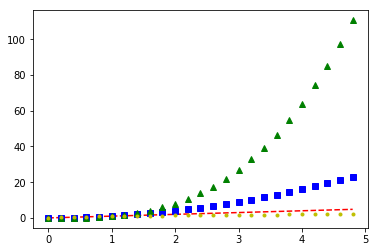

In [104]:
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^', t, t**(0.5), 'y.')
plt.show()
plt.close()

### Seaborn

* 基於Matplotlib所寫的視覺化package，用更high-level的函數畫出更好看的圖表^ ^
* 如果用pandas的資料型態，seaborn會直接用row/column的名字當作圖的label。
* Full documentation: https://seaborn.pydata.org/index.html

* 基本上用來視覺化的資料可以有四種：
    1. Vectors of data:  用lists、numpy arrays或是pandas Series表示的資料。
    2. Long-form DataFrame (stacked data): 一個column記錄數值、其他column記錄該數值的意義。 
    3. Wide-form DataFrame (unstacked data): 每個column都代表不同的資料特性，會各自被當成x軸的一類，
    4. An array or a list of 1.

In [124]:
plt.style.use('seaborn-dark')

tips = sns.load_dataset("tips")
tips.head(3) # wide-form

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [128]:
groups = tips.groupby(["sex", "day"]).mean().total_bill

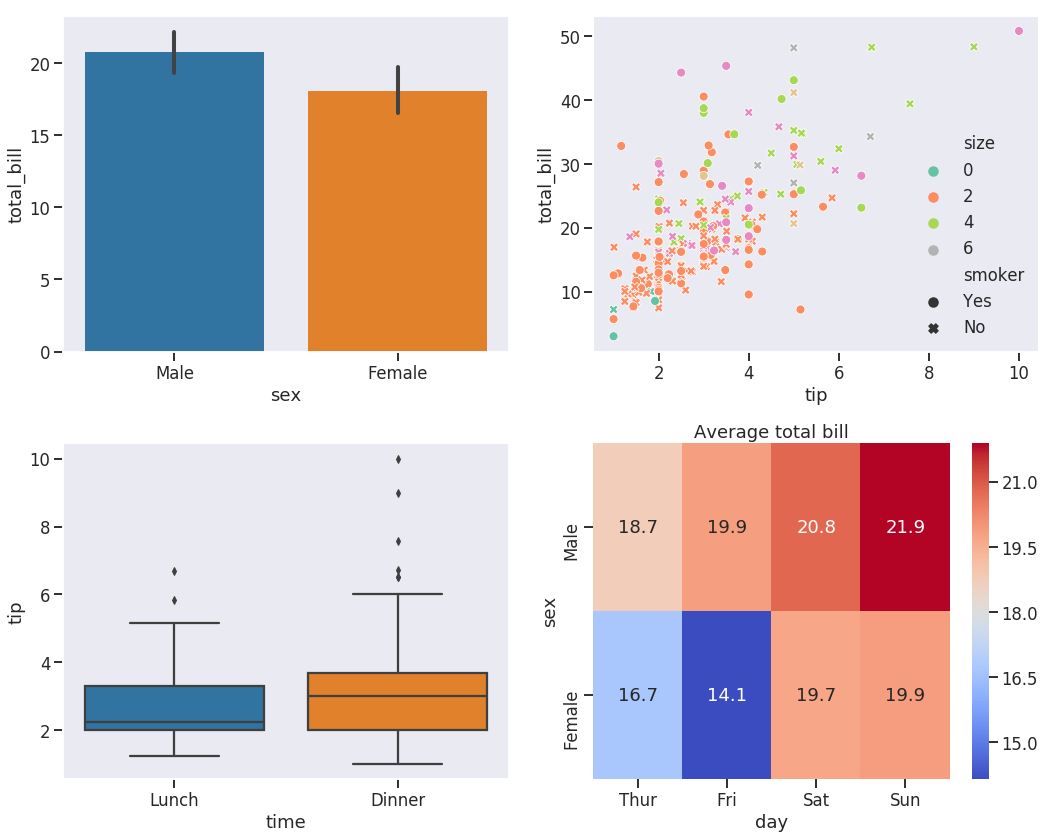

In [163]:
sns.set_context("talk") # "poster", "paper"
fig, ax = plt.subplots(2, 2, figsize=(15,12))

sns.barplot(x='sex', y='total_bill', data=tips, ax=ax[0][0])

sns.scatterplot(x='tip', y='total_bill', data=tips, ax=ax[0][1],
               hue='size', palette='Set2', style='smoker')

sns.boxplot(x='time', y='tip', data=tips, ax=ax[1][0])

sns.heatmap(groups.unstack(), ax=ax[1][1], annot=True, fmt=".1f",
            cmap='coolwarm')

ax[1][1].set_title("Average total bill")


plt.tight_layout() # 讓圖表們可以盡量不重疊又節省空間
plt.show()
plt.close()

##### 更改圖上的說明
* ```ax.set_title```
* ```set_xlabel, set_ylabel```
* ```set_xticks, set_yticks```
* [add text on it](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html#matplotlib.pyplot.text): ```plt.text()```

<img src="https://media.giphy.com/media/W9Cm30KKx1fRC/giphy.gif" align="center" height=400 width=400>

##### More plotting style

In [ ]:
print(plt.style.available)
plt.style.use('fivethirtyeight')

#### Practice:

* 選擇seaborn裡面其中一個dataset，用至少四種圖表視覺化資料中的任意關係。
* 將圖檔以dpi=600的解析度存下來。

In [159]:
print(sns.get_dataset_names())

/usr/local/lib/python3.5/dist-packages/seaborn/utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file /usr/local/lib/python3.5/dist-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="html5lib"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

* 其實pandas也可以[.....](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)